In [1]:
import sys
sys.path.append('..')

In [2]:
import alpenglow.stitching as st
import alpenglow.files as af

In [3]:
af.download_s3("76AO/Strips/im_000008_000019.tif", "./im_000008_000019.tif")

In [4]:
af.download_s3("76AO/Strips/im_000009_000019.tif", "./im_000009_000019.tif")

In [5]:
import skimage.external.tifffile as tif

In [6]:
image1 = tif.imread('./im_000008_000019.tif')
image2 = tif.imread('./im_000009_000019.tif')

In [7]:
im_stitch, shift = st.stitch(image1, image2)

../alpenglow/stitching.py:70: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  registered = np.zeros((rows1 + rows2 - overlap, cols1), dtype=int)
../alpenglow/stitching.py:73: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  registered[rows2-margin:, :cols1-shift[1]] = image1[overlap-margin:, shift[1]:]
../alpenglow/stitching.py:81: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  fade1[:, :cols1-shift[1]] = image1[overlap-margin:overlap, shift[1]:] * np.arange(0, 1, 0.01)[:, np.newaxis]


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from skimage import exposure

In [10]:
im_eq = exposure.equalize_adapthist(im_stitch)

/opt/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:106: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint16.
  "%s to positive image of type %s." % (dtypeobj_in, dtypeobj))
/opt/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:136: UserWarning: Downcasting int64 to uint16 without scaling because max value 49595 fits in uint16
  warn(msg)


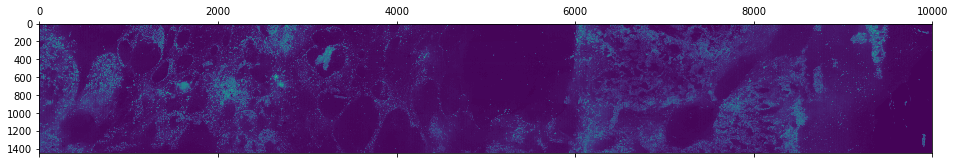

In [11]:
plt.matshow(im_eq[:, 10000:20000])